In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import model_from_json, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    if filenames:
        train_csv_path = os.path.join(dirname, filenames[0])
        test_csv_path = os.path.join(dirname, filenames[1])
        sample_submission_csv_path = os.path.join(dirname, filenames[2])

print(train_csv_path)
print(test_csv_path)
print(sample_submission_csv_path)

2.3.1
/kaggle/input/house-price-prediction-challenge/train.csv
/kaggle/input/house-price-prediction-challenge/test.csv
/kaggle/input/house-price-prediction-challenge/sample_submission.csv


Let's Load Train data and analyze about Columns in dataframe

In [40]:
df_train = pd.read_csv(train_csv_path)
df_cols = df_train.columns.values.tolist()
print(df_cols)

['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']


Model 1 : Only using Numerical Feature columns

In [41]:
categorical_columns = ['POSTED_BY','BHK_OR_RK','ADDRESS']
for col in categorical_columns:
    df_cols.remove(col)

In [234]:
Y = df_train[df_cols[-1]].values
X = df_train[df_cols[:-1]].values
X, Y = shuffle(X, Y)
print(X.shape)
print(Y.shape)

(29451, 8)
(29451,)


In [235]:
num_epoches = 80
batch_size = 128
val_split = 0.15

Standard Normalize Data

In [236]:
Xscalar = StandardScaler()
Xscalar.fit(X)

Xtrain = Xscalar.transform(X)
Ytrain = Y

In [214]:
# Yscalar = StandardScaler()
# Yscalar.fit(Y.reshape(-1, 1))

# Ytrain = Yscalar.transform(Y.reshape(-1, 1))
# Ytrain = Ytrain.squeeze()

In [237]:
def classifier1():
    n_features = Xtrain.shape[1]
    inputs = Input(shape=(n_features,))
    x = Dense(512, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
#     x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    
    model.compile(
        loss='mse',
        optimizer='adam'
    )
    history = model.fit(
                    Xtrain,
                    Ytrain,
                    batch_size=batch_size,
                    epochs=num_epoches,
                    validation_split=val_split
                    )
    return history, model
    
def plot_metrics(history):
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    
    loss_train = np.cumsum(loss_train) / np.arange(1,num_epoches+1)
    loss_val = np.cumsum(loss_val) / np.arange(1,num_epoches+1)
    plt.plot(loss_train, 'r', label='Training loss')
    plt.plot(loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [238]:
history1, model1 = classifier1()

Epoch 1/80
196/196 [==============================] - 1s 6ms/step - loss: 408196.0938 - val_loss: 416922.3750
Epoch 2/80
196/196 [==============================] - 1s 5ms/step - loss: 378549.1250 - val_loss: 414713.1250
Epoch 3/80
196/196 [==============================] - 1s 5ms/step - loss: 357434.7500 - val_loss: 418624.3750
Epoch 4/80
196/196 [==============================] - 1s 5ms/step - loss: 306063.5625 - val_loss: 425364.3125
Epoch 5/80
196/196 [==============================] - 1s 5ms/step - loss: 252982.4688 - val_loss: 395806.5312
Epoch 6/80
196/196 [==============================] - 1s 6ms/step - loss: 147089.5469 - val_loss: 269349.1875
Epoch 7/80
196/196 [==============================] - 1s 5ms/step - loss: 93063.7656 - val_loss: 347397.7812
Epoch 8/80
196/196 [==============================] - 1s 5ms/step - loss: 87641.2812 - val_loss: 219970.2188
Epoch 9/80
196/196 [==============================] - 1s 5ms/step - loss: 74437.9688 - val_loss: 192830.7031
Epoch 10/80
1

Epoch 76/80
196/196 [==============================] - 1s 5ms/step - loss: 36599.6914 - val_loss: 34053.0000
Epoch 77/80
196/196 [==============================] - 1s 5ms/step - loss: 41638.6523 - val_loss: 27432.3105
Epoch 78/80
196/196 [==============================] - 1s 5ms/step - loss: 45209.7930 - val_loss: 33532.8945
Epoch 79/80
196/196 [==============================] - 1s 5ms/step - loss: 36727.3320 - val_loss: 30595.3145
Epoch 80/80
196/196 [==============================] - 1s 5ms/step - loss: 33657.7578 - val_loss: 33362.6172


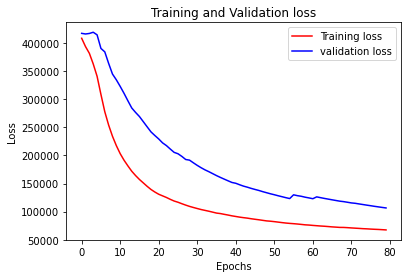

In [239]:
plot_metrics(history1)

In [240]:
df_test = pd.read_csv(test_csv_path)
df_cols_test = df_test.columns.values.tolist()

categorical_columns = ['POSTED_BY','BHK_OR_RK','ADDRESS']
for col in categorical_columns:
    df_cols_test.remove(col)
df_cols_test

['UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'LONGITUDE',
 'LATITUDE']

In [241]:
Xtest = df_test[df_cols_test].values
Xtest.shape

(68720, 8)

In [242]:
Xtest = Xscalar.transform(Xtest)
Ypred = model1.predict(Xtest)

In [243]:
submission_df = pd.read_csv(sample_submission_csv_path)
submission_df['TARGET(PRICE_IN_LACS)'] = Ypred
submission_df.head()

,TARGET(PRICE_IN_LACS)
0,28.047779
1,80.599052
2,39.142395
3,67.181664
4,24.283270


In [252]:
submission_csv_path = '/kaggle/working/submission.csv'
submission_df.to_csv(submission_csv_path)
